# 1. VISUALIZE THE SATELLITE DATA ALONG WITH RASTERIZED GROUND TRUTH 

In [ ]:
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORT ESSENTIAL LIBRARIES
import os
import numpy as np
from osgeo import gdal
# import gdal
import keras
import tensorflow as tf
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import exposure
from google.colab import drive

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# DEFINING A FUNCTION WHICH TAKES A "file_path" AND RETURNS A "tif" FILE AS A 3-DIMENSIONAL NUMPY ARRAY AS: WIDTH X HEIGHT X BANDS
def gtiff_to_array(file_path):
    data = gdal.Open(file_path)
    bands = [data.GetRasterBand(i+1).ReadAsArray() for i in range(data.RasterCount)]
    return np.stack(bands, axis = 2)

In [ ]:
# DEFINING A FUNCTION TO FETCH THE IMAGE ARRAY INFORMATION FOR VISUALIZATION
def fetch_tiles(path):
    tiles = {}
    for f in path:
      _, ext = os.path.splitext(f)
      if ext.lower() == ".tif":
        imgtype = f[-7:-4]
        tiles[imgtype] = gtiff_to_array(f)
    return tiles

In [ ]:
# DEFINING A FUNCTION TO VISUALIZE THE LABELS PREPARED FROM THE REFERENCE IMAGES
def visualize_labels(labels, fig_width = 5, fig_height = 5):
    fig = plt.figure(figsize = (fig_width, fig_height))
    a = fig.add_subplot(1, 1, 1)
    values = np.unique(labels.ravel())
    im = plt.imshow(labels[:, :, 0])
    a.set_title("GROUND TRUTH")
    # get the colors of the values, according to the 
    # colormap used by imshow
    colors = [im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    # labels = ["ROAD", "PARKING", "BUILDING", "GREEN AREAS", "OTHER AREAS"]
    labels = ["CLASS 1", "CLASS 2", "CLASS 3", "CLASS 4", "CLASS 5", "CLASS 6", "CLASS 7", "CLASS 8"]
    patches = [mpatches.Patch(color = colors[i], label = j) for i, j in zip(range(len(values)), labels)]
    # put those patched as legend-handles into the legend
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
# DEFINING A FUNCTION TO VISUALIZE THE SATELLITE IMAGE DATA
def visualize_data(data, title, fig_width = 5, fig_height = 5):
    # Visualize only RGB Bands
    data = data[:, :, 0:-1]
    # data = data[:, :, 0]
    _ = data[:, :, 0].copy()
    data[:, :, 0] = data[:, :, 2]
    data[:, :, 2] = _
    data = data.astype(np.float)
    
    # Perform Stretching for Better Visualization
    for i in range(data.shape[2]):
        p2, p98 = np.percentile(data[:, :, i], (2, 98))
        data[:, :, i] = exposure.rescale_intensity(data[:, :, i],
                                                      in_range=(p2, p98))
    fig = plt.figure(figsize = (fig_width, fig_height))
    a = fig.add_subplot(1,1,1)
    a.set_title(title)
    plt.imshow(data)

# OPENING FULL IMAGE JUST TO TEST THE MODEL ON FULL IMAGE

In [ ]:
# # PUTTING ALL THE "IMAGES" AND "LABELS" INSIDE VARIABLES "image_path" AND "mask_path"
# image_path_full = "/content/drive/MyDrive/DEEP_LEARNING/FULL_IMAGE/GROUND_TRUTH_LC/"
# mask_path_full = "/content/drive/MyDrive/DEEP_LEARNING/FULL_IMAGE/LABEL_LC/"

# # GETTING THE NAMES OF IMAGES AND MASKS
# image_list_full = os.listdir(image_path_full)
# mask_list_full = os.listdir(mask_path_full)

# # SORTING THE NAMES OF IMAGES AND MASKS IN ASCENDING NUMBER ORDER 
# image_list_full.sort()
# mask_list_full.sort()

# # CONCATENATING THE DIRECTORY WITH THE SPECIFIC IMAGE NAME AND EXTENSION
# image_list_full = [image_path_full + i for i in image_list_full]
# mask_list_full = [mask_path_full + i for i in mask_list_full]

In [ ]:
# # PRINTING DIRECTORY OF ALL THE "IMAGES" AND "LABELS"
# print("IMAGES:", image_list_full)
# print("LABELS:", mask_list_full)

IMAGES: ['/content/drive/MyDrive/DEEP_LEARNING/FULL_IMAGE/GROUND_TRUTH_LC/raster.tif']
LABELS: ['/content/drive/MyDrive/DEEP_LEARNING/FULL_IMAGE/LABEL_LC/raster.tif']


In [ ]:
# # FETCH ALL THE ARRAY INFORMATION WITHIN THE VARIABLE "image_tiles" AND "label_tiles" FOR VISUALIZATION
# image_tiles_full = fetch_tiles(image_list_full)
# label_tiles_full = fetch_tiles(mask_list_full)

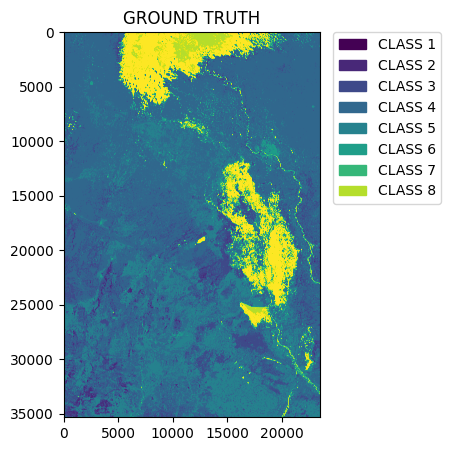

In [ ]:
# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# # IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
# image_number_full = "ter"
# # visualize_data(image_tiles_full[image_number_full], "INPUT IMAGE")
# visualize_labels(label_tiles_full[image_number_full])

# OPENING 16 GRID IMAGE TO TEST THE MODEL

In [ ]:
# PUTTING ALL THE "IMAGES" AND "LABELS" INSIDE VARIABLES "image_path" AND "mask_path"
image_path_16_grid = "/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/"
mask_path_16_grid = "/content/drive/MyDrive/DEEP_LEARNING/16_GRID/LABEL_LC/"

# GETTING THE NAMES OF IMAGES AND MASKS
image_list_16_grid = os.listdir(image_path_16_grid)
mask_list_16_grid = os.listdir(mask_path_16_grid)

# SORTING THE NAMES OF IMAGES AND MASKS IN ASCENDING NUMBER ORDER 
image_list_16_grid.sort()
mask_list_16_grid.sort()

# CONCATENATING THE DIRECTORY WITH THE SPECIFIC IMAGE NAME AND EXTENSION
image_list_16_grid = [image_path_16_grid + i for i in image_list_16_grid]
mask_list_16_grid = [mask_path_16_grid + i for i in mask_list_16_grid]

In [ ]:
# PRINTING DIRECTORY OF ALL THE "IMAGES" AND "LABELS"
print("SATELLITE IMAGES:", image_list_16_grid)
print("LABELS:", mask_list_16_grid)

SATELLITE IMAGES: ['/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_0.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_1.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_10.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_11.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_12.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_13.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_14.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_15.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_16.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_17.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_18.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/GROUND_TRUTH_LC/RASTER_19.tif', '/content/drive/MyDrive/DEEP_LEARNING/16_GRID/G

In [ ]:
# FETCH ALL THE ARRAY INFORMATION WITHIN THE VARIABLE "image_tiles" AND "label_tiles" FOR VISUALIZATION
image_tiles_16_grid = fetch_tiles(image_list_16_grid)
label_tiles_16_grid = fetch_tiles(mask_list_16_grid)

In [ ]:
# DEFINE THE PATH TO THE DIRECTORY IN GOOGLE DRIVE
output_dir = "/content/drive/MyDrive/DEEP_LEARNING/TRAINING_DATASET/"

# SAVE THE DATA TO GOOGLE DRIVE
np.save(output_dir + "image_tiles_16_grid.npy", image_tiles_16_grid)
np.save(output_dir + "label_tiles_16_grid.npy", label_tiles_16_grid)

In [ ]:
# # LOAD THE DATA FROM GOOGLE DRIVE
# output_dir = "/content/drive/MyDrive/DEEP_LEARNING/TRAINING_DATASET/"

# image_tiles_16_grid = np.load(output_dir + "image_tiles_16_grid.npy", allow_pickle = True).item()
# label_tiles_16_grid = np.load(output_dir + "label_tiles_16_grid.npy", allow_pickle = True).item()

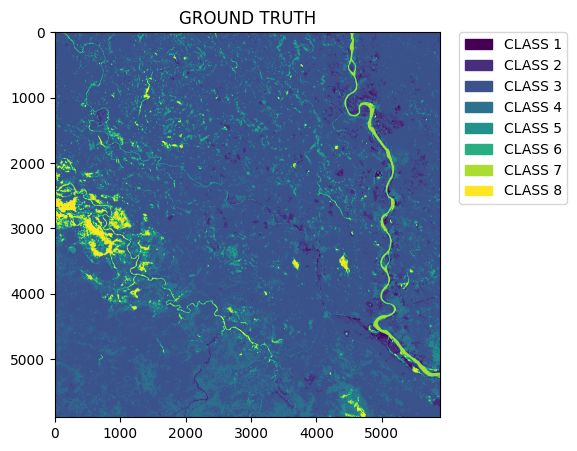

In [ ]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_16_grid = "R_6"
# visualize_data(image_tiles_16_grid[image_number_16_grid], "INPUT IMAGE")
visualize_labels(label_tiles_16_grid[image_number_16_grid])

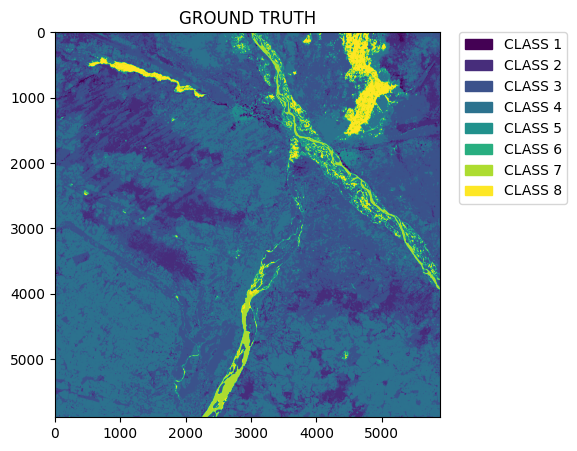

In [ ]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_16_grid_2 = "_23"
# visualize_data(image_tiles_16_grid[image_number_16_grid], "INPUT IMAGE")
visualize_labels(label_tiles_16_grid[image_number_16_grid_2])

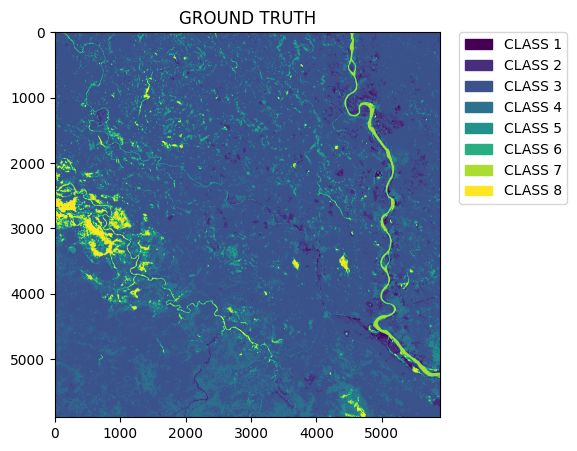

In [ ]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_16_grid_2 = "R_6"
# visualize_data(image_tiles_16_grid[image_number_16_grid], "INPUT IMAGE")
visualize_labels(label_tiles_16_grid[image_number_16_grid_2])

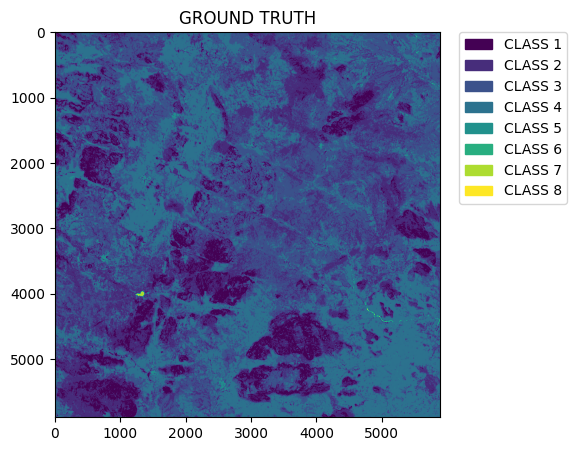

In [ ]:
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 0 TO 9, RIGHT AN UNDERSCORE BEFORE IT E.G. "R_0" INSTEAD OF 0 OR "R_9" INSTEAD OF 9
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 10 TO 99, RIGHT AN UNDERSCORE BEFORE IT E.G. "_10" INSTEAD OF 10 OR "_90" INSTEAD OF 90
# IF YOU WANT TO VISUALIZE AN IMAGE AND LABEL BETWEEN 100 TO 143, RIGHT IT AS IT IS I.E. "100" FOR 1O0 OR "119" FOR "119"
image_number_16_grid_2 = "_20"
# visualize_data(image_tiles_16_grid[image_number_16_grid], "INPUT IMAGE")
visualize_labels(label_tiles_16_grid[image_number_16_grid_2])

# 2. SPLITTING THE TILES IN THE FORM OF PATCHES IN A GRID WISE MANNER 

# FULL IMAGE

In [ ]:
# SETTING UP THE PATCH SIZE AND IDENTIFICATION OF THE NUMBER OF BANDS
patch_size = 256
# nbands = 1
# nbands = image_tiles_full["ter"].shape[-1]
nbands = image_tiles_16_grid["R_0"].shape[-1]
print("NUMBER OF BANDS ARE:", nbands)

NUMBER OF BANDS ARE: 4


In [ ]:
# DEFINING A FUNCTION FOR CONVERTING IMAGES AND LABELS INTO PATCHES OF 256 x 256
def gridwise_sample(imgarray, patchsize):
    nrows, ncols, nbands = imgarray.shape
    patchsamples = np.zeros(shape = (0, patchsize, patchsize, nbands),
                            dtype = imgarray.dtype)
    for i in range(int(nrows/patchsize)):
        for j in range(int(ncols/patchsize)):
            tocat = imgarray[i * patchsize:(i + 1)*patchsize,
                             j * patchsize:(j + 1)*patchsize, :]
            tocat = np.nan_to_num(tocat, nan = np.nanmedian(tocat))
            tocat[tocat < -1] = np.median(tocat)
            tocat = np.expand_dims(tocat, axis = 0)
            patchsamples = np.concatenate((patchsamples, tocat),axis=0)
    return patchsamples

In [ ]:
# # SETTING UP FULL IMAGE FOR SENTINEL-2 DATASET
# Xtrain_full = np.zeros(shape = (0, patch_size, patch_size, nbands), dtype = np.float32)
# Ytrain_full = np.zeros(shape = (0, patch_size, patch_size, 1), dtype = np.uint8)

# # Sample of each Training Tile Systematically in a Gridwise Manner
# train_areas_full = ["ter"]

# for area in train_areas_full:
#     X_toadd_full = gridwise_sample(image_tiles_full[area], patch_size)
#     Y_toadd_full = gridwise_sample(label_tiles_full[area], patch_size)
#     Xtrain_full = np.concatenate((Xtrain_full, X_toadd_full), axis = 0)
#     Ytrain_full = np.concatenate((Ytrain_full, Y_toadd_full), axis = 0)

# # Encode all Non-Deforestation Classes as Class "2"
# # Ytrain_full[Ytrain_full!=1] = 2
# print("There are %i Training Patches in Google Earth Satellite Imagery Raster of Size 256 x 256" % (Xtrain_full.shape[0]))

In [ ]:
# # VISUALIZING ONE RANDOM 256 x 256 PATCH I.E. IMAGE AGAINST ITS LABEL
# patch_number = 399
# # visualize_data(Xtrain_full[patch_number], "Training Patch " + str(patch_number), 4, 4)
# visualize_labels(Ytrain_full[patch_number], 4, 4)

# IMAGE DIVIDED INTO 16 GRID

In [ ]:
# SETTING UP THE PATCH SIZE AND IDENTIFICATION OF THE NUMBER OF BANDS
nband_16_grid = image_tiles_16_grid["R_0"].shape[-1]
print("NUMBER OF BANDS IN GOOGLE EARTH SATELLITE IMAGERY RASTER:", nband_16_grid)

NUMBER OF BANDS IN GOOGLE EARTH SATELLITE IMAGERY RASTER: 4


In [ ]:
# SETTING UP FULL IMAGE FOR SENTINEL-2 DATASET
Xtrain_16_grid = np.zeros(shape = (0, patch_size, patch_size, nband_16_grid), dtype = np.float32)
Ytrain_16_grid = np.zeros(shape = (0, patch_size, patch_size, 1), dtype = np.uint8)

# Sample of each Training Tile Systematically in a Gridwise Manner
# train_areas_16_grid = ["R_1", "R_2", "R_3" ,"R_4", "R_5", "R_6", "R_7", "R_8", "R_9", 
#                        "_10", "_12", "_13", "_14", "_15", "_16", "_18", "_19", "_20", 
#                        "_21", "_22"] # "R_0", "_11", "_17" AND "_23" ARE KEPT FOR TEST SET 

# train_areas_16_grid = ["R_1", "R_2", "R_3" ,"R_4", "R_5", "R_6", "R_7", "R_8", "R_9", 
#                        "_10"] # "R_0", "_11", "_17" AND "_23" ARE KEPT FOR TEST SET 

train_areas_16_grid = ["R_5", "R_6", "_20" ,"_23"]
                       
for area in train_areas_16_grid:
    X_toadd_16_grid = gridwise_sample(image_tiles_16_grid[area], patch_size)
    Y_toadd_16_grid = gridwise_sample(label_tiles_16_grid[area], patch_size)
    Xtrain_16_grid = np.concatenate((Xtrain_16_grid, X_toadd_16_grid), axis = 0)
    Ytrain_16_grid = np.concatenate((Ytrain_16_grid, Y_toadd_16_grid), axis = 0)

# Encode all Non-Deforestation Classes as Class "2"
# Ytrain_16_grid[Ytrain_16_grid!=1] = 2
print("There are %i Training Patches in Google Earth Satellite Imagery Raster of Size 256 x 256" % (Xtrain_16_grid.shape[0]))

There are 2116 Training Patches in Google Earth Satellite Imagery Raster of Size 256 x 256


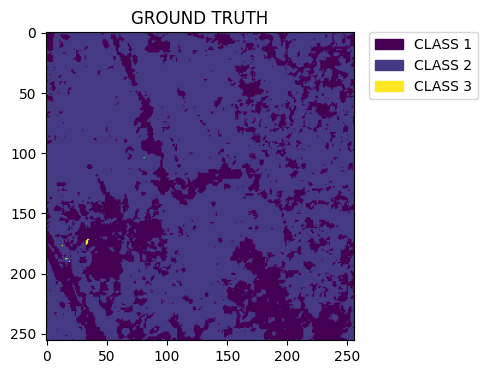

In [ ]:
# VISUALIZING ONE RANDOM 256 x 256 PATCH I.E. IMAGE AGAINST ITS LABEL
patch_number_16_grid = 311
# visualize_data(Xtrain_16_grid[patch_number], "Training Patch " + str(patch_number), 4, 4)
visualize_labels(Ytrain_16_grid[patch_number_16_grid], 4, 4)

# 3. SETTING UP THE FULLY CONVOLUTIONAL NETWORK (FCN)

In [ ]:
# IMPORTING THE ESSENTIAL LIBRARIES
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Activation, BatchNormalization, Reshape
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adadelta
import tensorflow.python.keras.backend as K
sess = K.get_session()
from tensorflow.compat.v1.keras.backend import set_session

In [ ]:
# # DEFINING A FUNCTION FOR CONVERTING GROUND TRUTH TO ONE-HOT ENCODING
# def to_categorical_4d(y, nc):
#     Y = np.zeros((y.shape[0],
#                   y.shape[1],
#                   y.shape[2],
#                   nc),
#                   dtype=np.int32)
#     for h in range(y.shape[0]):
#         for i in range(y.shape[1]):
#             for j in range(y.shape[2]):
#                 if y[h, i, j, 0]!= 0:
#                     Y[h, i, j, y[h, i, j, 0]-1] = 1
#                 else:
#                     continue
#     return Y

In [ ]:
# # Count the number of unique classes present in the Ground Truth Label
# num_classes = len(np.unique(Ytrain_16_grid))

# # Print the number of classes
# print("Number of classes in the Ground Truth Label:", num_classes)

In [ ]:
# # Compute the maximum value of Ytrain_16_grid
# max_val = np.max(Ytrain_16_grid)

# # Print the maximum value
# print("Maximum value of Ytrain_16_grid:", max_val)

In [ ]:
# unique_values = np.unique(Ytrain_16_grid)
# print("Unique values in Ytrain_16_grid:", unique_values)

In [ ]:
def to_categorical_4d_3(y, nc):
    # y = shape (n_samples, height, width, channels)
    Y = np.zeros((y.shape[0], y.shape[1], y.shape[2], nc), dtype = np.int32)
    for h in range(y.shape[0]):
        for i in range(y.shape[1]):
            for j in range(y.shape[2]):
                if y[h, i, j, 0] == 10:
                    Y[h, i, j, 0] = 1
                elif y[h, i, j, 0] == 20:
                    Y[h, i, j, 1] = 1
                elif y[h, i, j, 0] == 30:
                    Y[h, i, j, 2] = 1
                elif y[h, i, j, 0] == 40:
                    Y[h, i, j, 3] = 1
                elif y[h, i, j, 0] == 50:
                    Y[h, i, j, 4] = 1
                elif y[h, i, j, 0] == 60:
                    Y[h, i, j, 5] = 1
                elif y[h, i, j, 0] == 80:
                    Y[h, i, j, 6] = 1
                elif y[h, i, j, 0] == 90:
                    Y[h, i, j, 7] = 1
                else:
                    continue
    return Y

In [ ]:
# TRANSFORM TARGET ARRAYS TO ONE-HOT ENCODINGS
Ytrain_16_grid_3 = to_categorical_4d_3(Ytrain_16_grid, 8)

In [ ]:
Ytrain_16_grid.shape

(2116, 256, 256, 1)

In [ ]:
Ytrain_16_grid_3.shape

(2116, 256, 256, 8)

In [ ]:
# count the number of samples in each class
class_counts = np.sum(Ytrain_16_grid_3, axis = (0, 1, 2))
print(class_counts)

# calculate the class imbalance ratio
imbalance_ratio = np.max(class_counts) / class_counts
print(imbalance_ratio)

[ 3706236 14669050 77071906 35992273   656207   866770   820917  4890817]
[ 20.79519653   5.2540489    1.           2.14134589 117.45060019
  88.91852048  93.88513821  15.75849311]


In [ ]:
# Save the one-hot encoded labels to Google Drive
np.save('/content/drive/MyDrive/DEEP_LEARNING/TRAINING_DATASET/Ytrain_16_grid_encoded.npy', Ytrain_16_grid_3)

In [ ]:
# # Load the one-hot encoded labels from Google Drive
# Ytrain_16_grid = np.load('/content/drive/MyDrive/DEEP_LEARNING/TRAINING_DATASET/Ytrain_16_grid_encoded.npy')

# OVERSAMPLING THE MINORITY CLASS FOR HANDLING CLASS IMBALANCE

In [ ]:
# # Oversample minority class 
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from sklearn.model_selection import train_test_split

# def oversample_minority_class(X, y, batch_size, num_classes):
#     datagen_args = dict(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True
#     )
    
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#     image_datagen = ImageDataGenerator(**datagen_args)
#     mask_datagen = ImageDataGenerator(**datagen_args)

#     # Seed must be set to the same value to ensure X and y are augmented in the same way
#     seed = 1
#     image_datagen.fit(X_train, augment=True, seed=seed)
#     mask_datagen.fit(y_train, augment=True, seed=seed)

#     image_generator = image_datagen.flow(X_train, batch_size=batch_size, seed=seed)
#     mask_generator = mask_datagen.flow(y_train, batch_size=batch_size, seed=seed)

#     train_generator = zip(image_generator, mask_generator)
#     val_generator = (X_val, y_val)

#     return train_generator, val_generator

# TIME TO TRAIN THE MODEL

In [ ]:
# IMPORTING THE ESSENTIAL LIBRARIES FOR SEGNET
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [ ]:
# DEFINING A FUNCTION FOR CALCULATING JACARD COEFFICIENT
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

# DEFINING A FUNCTION TO PREPARE SEGNET ARCHITECTURE MODEL

In [ ]:
# IMPORT THE LIBRARIES ESSENTIAL FOR SEGNET
from keras.layers import Activation, Dense, BatchNormalization, Dropout, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Input, Reshape

In [ ]:
from tensorflow.keras.applications import ResNet50

In [ ]:
# U-NET ARCHITECTURE

def segnet_model(optimizer, nrows, ncols, nbands, nclasses) -> Model:
    # Defining the input layer
    img_input = Input((nrows, ncols, nbands))

    # Defining the encoder part of the U-Net with skip connections
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(img_input)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D((2, 2))(drop4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Defining the decoder part of the U-Net with skip connections
    up6 = Conv2D(512, (2, 2), activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = Conv2D(256, (2, 2), activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = Conv2D(128, (2, 2), activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, (2, 2), activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    outputs = Conv2D(nclasses, (1, 1), activation='softmax')(conv9)

    model = Model(inputs = img_input, outputs = outputs)
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

    return model

# DIVIDING THE DATASET INTO TRAINING, VALIDATION AND TEST SET

In [ ]:
# # DIVIDING THE SENTINEL-2 DATASET INTO TRAINING (70%) AND VALIDATION (15%), AND TEST SET (15%)
# from sklearn.model_selection import train_test_split

# # Assuming Xtrain_16_grid and Ytrain_16_grid are numpy arrays or pandas DataFrames
# x = Xtrain_16_grid
# y = Ytrain_16_grid

# # First, split the dataset into a 70% training set and a 30% temporary set
# x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size = 0.3, random_state = 42)

# # Now, split the temporary set into 50% validation set and 50% test set, 
# # which corresponds to 15% validation and 15% test of the original dataset
# x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size = 0.5, random_state = 42)

In [ ]:
# DIVIDING THE SENTINEL-1 DATASET INTO TRAINING AND VALIDATION SET
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(Xtrain_16_grid, Ytrain_16_grid_3, test_size = 0.15, random_state = 1)

print("TRAINING AND VALIDATION SET OF SENTINEL-1 RASTER:")
print("X-TRAIN:", x_train.shape[0], "PATCHES")
print("Y-TRAIN:", y_train.shape[0], "PATCHES")
print("\nX-VALIDATION:", x_val.shape[0], "PATCHES")
print("Y-VALIDATION:", y_val.shape[0], "PATCHES")

TRAINING AND VALIDATION SET OF SENTINEL-1 RASTER:
X-TRAIN: 1798 PATCHES
Y-TRAIN: 1798 PATCHES

X-VALIDATION: 318 PATCHES
Y-VALIDATION: 318 PATCHES


In [ ]:
# DEFINING A FUNCTION FOR TRAINING THE MODEL USING "MODEL CHECKPOINT", "EARLY STOPPING" AND "CSV LOGGER"
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
import imp, h5py
imp.reload(h5py)

model_fname = "/content/drive/MyDrive/DEEP_LEARNING/TRAINED_MODEL/LAND_COVER/SEGNET_Weights_Improvement_{epoch:02d}_{val_acc:.2f}.hdf5"
csv_logger_save = "/content/drive/MyDrive/DEEP_LEARNING/TRAINED_MODEL/LAND_COVER/SEGNET_256_LOGS.csv"

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 100)
checkpoint = ModelCheckpoint(model_fname, monitor = "val_acc", verbose = 1, save_best_only = True, mode = "max")
csv_logger = CSVLogger(csv_logger_save, separator = ",", append = False)
callbacks_list = [early_stop, checkpoint, csv_logger]

def train(model, data, labels):
    hist = model.fit(x = data,
                     y = labels,
                     epochs = number_epochs, 
                     verbose = 2, 
                     validation_data = (x_val, y_val),
                     callbacks = callbacks_list,
                     batch_size = 5)
    return hist

In [ ]:
# DEFINING A FUNCTION FOR "recall_m"
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [ ]:
# DEFINING A FUNCTION FOR "precision_m"
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
# DEFININF A FUNCTION FOR "f1_m"
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# SETTING UP THE BASIC PARAMETERS OF THE FULLY CONVOLUTIONAL NETWORK (FCN)
number_bands = 4
number_classes = 8
number_epochs = 100
# activation = 'softmax'

In [ ]:
# WEIGHTED LOSS FUNCTION TO TRY HANDLING THE ISSUE OF CLASS IMBALANCE
# Define the number of samples in each class
# class_samples = [0.02, 1.35, 11.08, 56.08, 18.72, 0.61, 0.28, 0, 10.32]
class_samples = [0.09, 2.8, 8.24, 53.69, 10.15, 0.39, 0.7, 3.64, 20.3]

# Calculate the total number of samples
total_samples = sum(class_samples)

# Calculate the class weights as inverses of the class frequencies
class_weights = [total_samples / (len(class_samples) * class_samples[i]) for i in range(len(class_samples))]

# Define the weighted categorical cross-entropy loss function
def weighted_categorical_crossentropy(class_weights):
    def loss(y_true, y_pred):
        # Flatten the labels and predictions to 2D arrays
        y_true_flat = K.flatten(y_true)
        y_pred_flat = K.flatten(y_pred)

        # Cast the types of y_true_flat and y_pred_flat to float32
        y_true_flat = K.cast(y_true_flat, dtype = 'float32')
        y_pred_flat = K.cast(y_pred_flat, dtype = 'float32')

        # Calculate the weighted cross-entropy loss
        ce = K.categorical_crossentropy(y_true_flat, y_pred_flat)
        weighted_ce = K.mean(ce * K.gather(class_weights, K.argmax(y_true_flat)))

        return weighted_ce

    return loss

# # Use the weighted loss function when compiling the model
# opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
# fcn_sar = segnet_model(opt, patch_size, patch_size, number_bands, number_classes)
# fcn_sar.compile(optimizer = opt, loss = weighted_categorical_crossentropy(class_weights), metrics = ['acc', f1_m,precision_m, recall_m])

In [ ]:
# DEFINING THE FULLY CONVOLUTIONAL NETWORK (FCN) MODEL SPECIFICALLY THE U-NET
opt = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
fcn_sar = segnet_model(opt, patch_size, patch_size, number_bands, number_classes)
fcn_sar.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc', f1_m,precision_m, recall_m]) #'adam'
# fcn_sar.compile(optimizer = opt, loss = weighted_categorical_crossentropy(class_weights), metrics = ['acc', f1_m,precision_m, recall_m])

# TIME TO RUN THE MODEL

In [ ]:
# TIME TO TRAIN AND SAVE THE FCN MODEL
history = train(fcn_sar, x_train, y_train)
fcn_sar.save(model_fname)

Epoch 1/100

Epoch 1: val_acc improved from 0.02698 to 0.55960, saving model to /content/drive/MyDrive/DEEP_LEARNING/TRAINED_MODEL/LAND_COVER/SEGNET_Weights_Improvement_01_0.56.hdf5
360/360 - 23s - loss: 1.2105 - acc: 0.5504 - f1_m: 0.4509 - precision_m: 0.5753 - recall_m: 0.3961 - val_loss: 1.0514 - val_acc: 0.5596 - val_f1_m: 0.5457 - val_precision_m: 0.6078 - val_recall_m: 0.4983 - 23s/epoch - 63ms/step
Epoch 2/100

Epoch 2: val_acc improved from 0.55960 to 0.56730, saving model to /content/drive/MyDrive/DEEP_LEARNING/TRAINED_MODEL/LAND_COVER/SEGNET_Weights_Improvement_02_0.57.hdf5
360/360 - 18s - loss: 1.0520 - acc: 0.5591 - f1_m: 0.4693 - precision_m: 0.6314 - recall_m: 0.3960 - val_loss: 0.9688 - val_acc: 0.5673 - val_f1_m: 0.5190 - val_precision_m: 0.6278 - val_recall_m: 0.4481 - 18s/epoch - 49ms/step
Epoch 3/100

Epoch 3: val_acc did not improve from 0.56730
360/360 - 17s - loss: 0.9940 - acc: 0.5645 - f1_m: 0.4859 - precision_m: 0.6362 - recall_m: 0.4150 - val_loss: 0.9723 - v

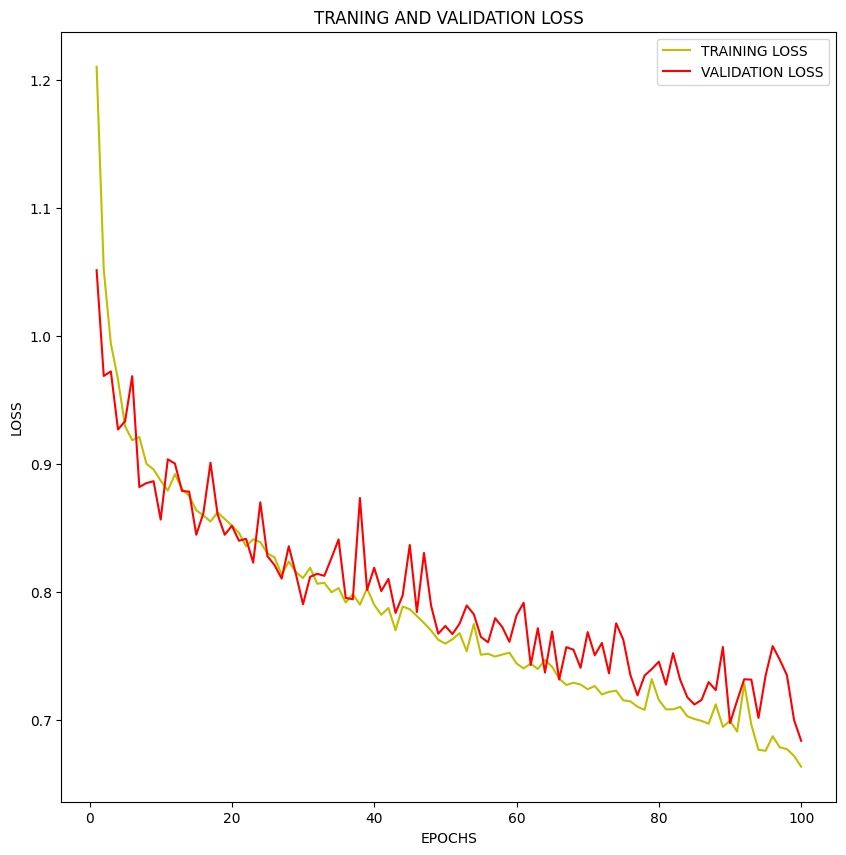

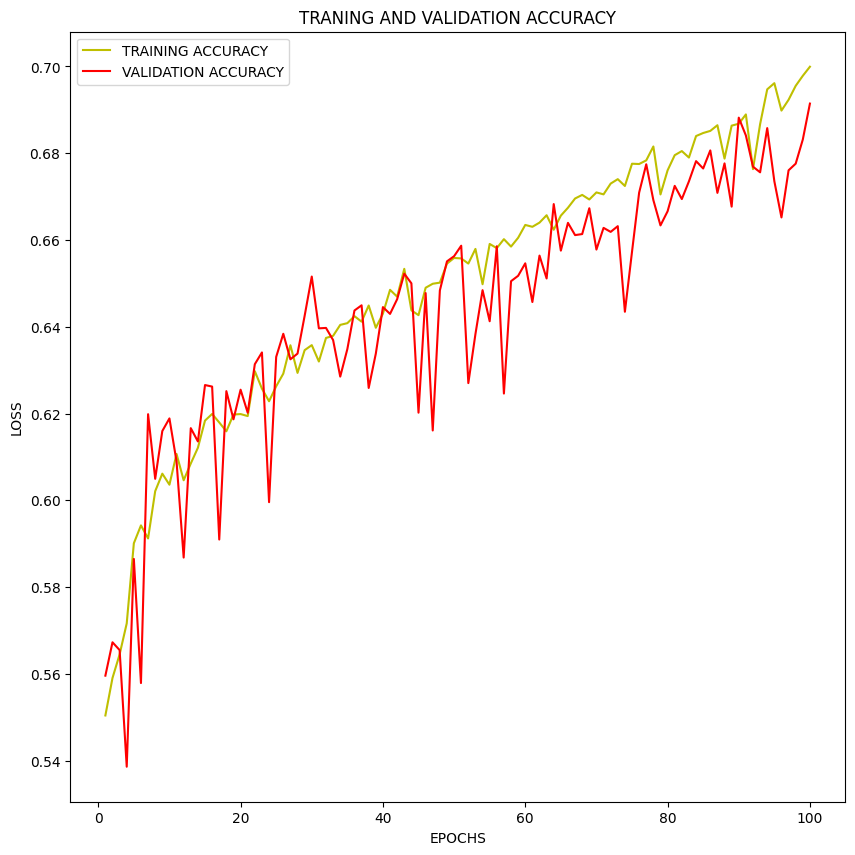

In [ ]:
# PLOTTING THE TRAINING AND VALIDATION LOSS OF THE MODEL
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'TRAINING LOSS')
plt.plot(epochs, val_loss, 'r', label = 'VALIDATION LOSS')
plt.title('TRANING AND VALIDATION LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# PLOTTING THE TRAINING AND VALIDATION ACCURACY OF THE MODEL
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
epochs_2 = range(1, len(accuracy) + 1)
plt.plot(epochs_2, accuracy, 'y', label = 'TRAINING ACCURACY')
plt.plot(epochs_2, validation_accuracy, 'r', label = 'VALIDATION ACCURACY')
plt.title('TRANING AND VALIDATION ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# PREDICTION ON TRAINING, VALIDATION AND TEST SET USING THE TRAINED WEIGHTS